<a href="https://colab.research.google.com/github/Rizqisafitri/Reviews_Crewdible/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [ ]:
from google.colab import files
file = files.upload()


Saving dataCrewdible.xlsx to dataCrewdible (4).xlsx


In [ ]:
df = pd.read_excel('dataCrewdible.xlsx')
df.head(5)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,af93b80f-b093-4dc9-97ae-e8103ced7ab4,Benayaptr,https://play-lh.googleusercontent.com/a-/AOh14...,"bagus aplikasinya, rekomen banget untuk yg lag...",5,0,3.6.7,2022-06-24 15:20:23,NaN,NaT
1,1,f2a203e6-6d6d-429f-9e87-173cb5e5bc0f,Chelsea Putri,https://play-lh.googleusercontent.com/a-/AOh14...,Sangat puas dengan aplikasi ini sebab sangat b...,5,0,3.6.7,2022-06-24 14:49:35,NaN,NaT
2,2,6dfbc264-2861-40d6-ba2e-c70a6b4e3e13,tresha agatha,https://play-lh.googleusercontent.com/a-/AOh14...,This app really helpful 👍 And also nice to use,5,0,3.6.7,2022-06-24 14:40:08,NaN,NaT
3,3,f5a46c64-f07e-4808-aad0-0ae19f342c20,Said Muhammad Izzat,https://play-lh.googleusercontent.com/a-/AOh14...,"Dari pertama kali pake, langsung mengerti.. Ap...",5,0,3.6.7,2022-06-24 14:24:09,NaN,NaT
4,4,2b25ac72-dce9-48a1-8641-f8fccb979fe1,20-057 Fernaldi Aulia,https://play-lh.googleusercontent.com/a-/AOh14...,Simple and easy to understand UI makes this ap...,5,0,3.6.7,2022-06-24 12:59:17,NaN,NaT


# **Analyze and Explore Data**

In [ ]:
data =df[['content', 'score']]
data

,content,score
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5
1,Sangat puas dengan aplikasi ini sebab sangat b...,5
2,This app really helpful 👍 And also nice to use,5
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5
4,Simple and easy to understand UI makes this ap...,5
...,...,...
351,great app,5
352,I can't use it. It always stopped,1
353,Apps masih tahap penyempurnaan.Langsung diarah...,3
354,Best 4ever,5


In [ ]:
# looking the shape DataSet
data.shape

(356, 2)

In [ ]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  356 non-null    object
 1   score    356 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [ ]:
#checking null value 
data.isna().sum()

content    0
score      0
dtype: int64

In [ ]:
tb_counts=data['score'].value_counts()
tb_counts

5    294
1     36
3     12
4      8
2      6
Name: score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


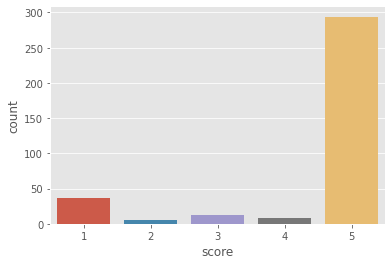

In [ ]:
sns.countplot(df['score'])
plt.show()

In [ ]:
# Length of word in sentence
data['Length'] = data['content'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,score,Length
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98
2,This app really helpful 👍 And also nice to use,5,46
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131
4,Simple and easy to understand UI makes this ap...,5,94


**WordCloud Score 5**

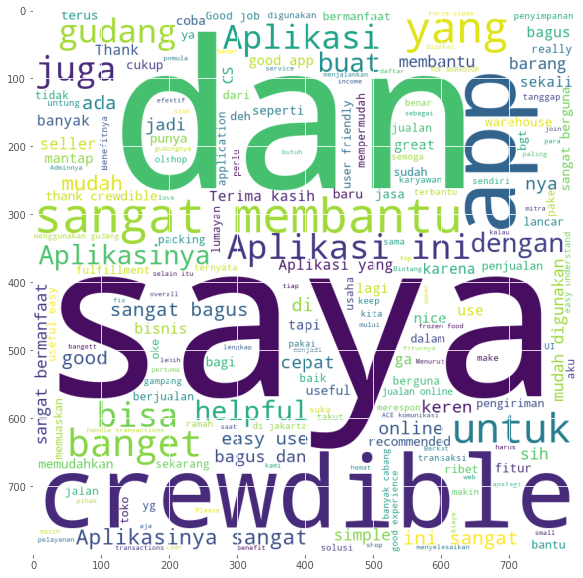

In [ ]:
data_5=data[data["score"]==5]

plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_5['content']))

plt.imshow(wc1)

**WordCloud Score 4**

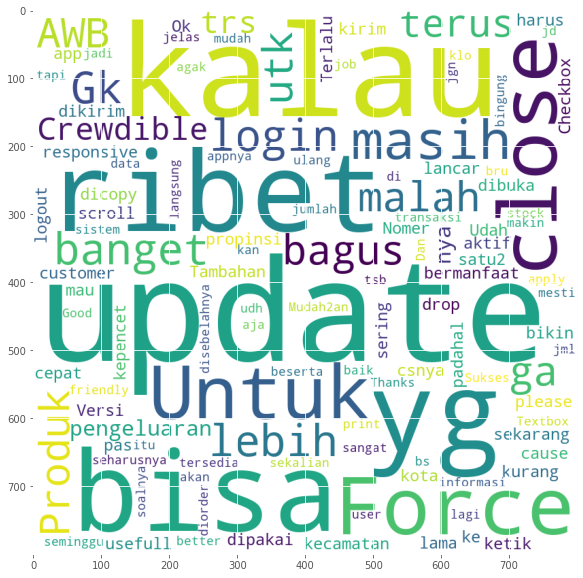

In [ ]:
data_4=data[data["score"]==4]

plt.figure(figsize=(10,10))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_4['content']))

plt.imshow(wc4)

**WordCloud Score 3**

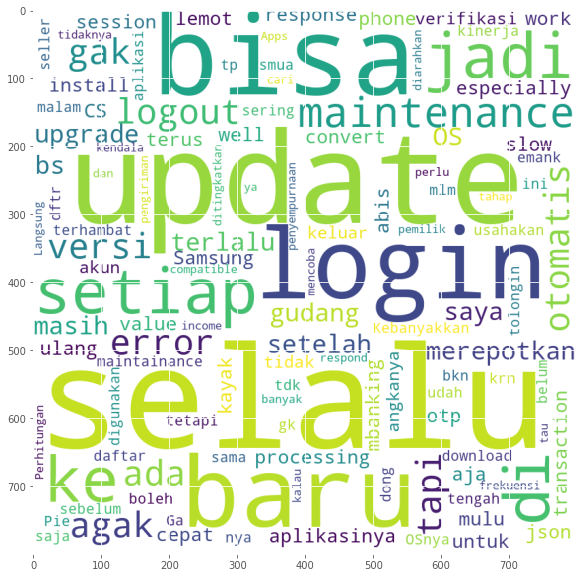

In [ ]:
data_3=data[data["score"]==3]
plt.figure(figsize=(10,10))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_3['content']))

plt.imshow(wc3)

**WordCloud Score 2**

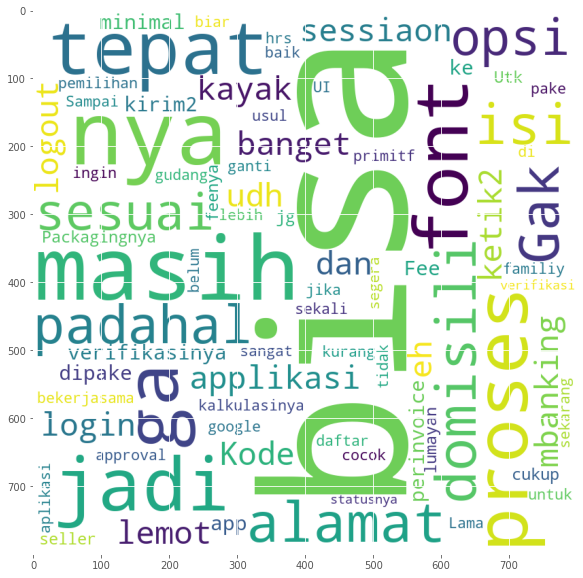

In [ ]:
data_2=data[data["score"]==2]

plt.figure(figsize=(10,10))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_2['content']))

plt.imshow(wc2)

**WordCloud Score 1**

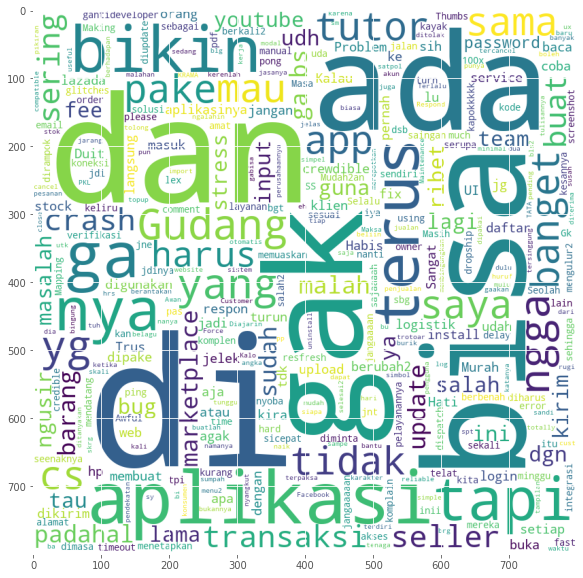

In [ ]:
data_1=data[data["score"]==1]

plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_1['content']))

plt.imshow(wc1)

Clean Text

In [ ]:
data.head()

,content,score,Length
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98
2,This app really helpful 👍 And also nice to use,5,46
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131
4,Simple and easy to understand UI makes this ap...,5,94


In [ ]:
# Length of word in sentence
data['Length'] = data['content'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,score,Length
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98
2,This app really helpful 👍 And also nice to use,5,46
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131
4,Simple and easy to understand UI makes this ap...,5,94


In [ ]:
# first review
a=data.iloc[0,0]
a

'bagus aplikasinya, rekomen banget untuk yg lagi butuh penyimpanan dll. worth it banget sih ini!!!'

In [ ]:
# import library for Natural Language Toolkit

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
# remove any symbol and cover letter to lowercase

a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['bagus',
 'aplikasinya',
 'rekomen',
 'banget',
 'untuk',
 'yg',
 'lagi',
 'butuh',
 'penyimpanan',
 'dll',
 'worth',
 'it',
 'banget',
 'sih',
 'ini']

In [ ]:
# dowmload the stopword from nlit library 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# show what the stopwords 

sw=set(stopwords.words('english','indonesian'))
print(sw)

{"aren't", "weren't", 'theirs', 'its', 'once', 're', 'that', 'why', 'before', 'my', 'on', 'there', "mightn't", 'have', 'or', 'o', 'now', 'between', 'had', 'himself', 'your', 'own', 'am', 'you', 'over', "isn't", 'a', "wouldn't", 'some', 'being', 'into', 'then', 'hadn', 'which', 'further', 'couldn', 'same', 'just', 'if', 'aren', 'and', 'been', 'during', 'down', 'needn', 'no', 'herself', 'should', "hasn't", 'me', 'itself', 'ain', 'most', 'he', 'under', 'who', 'below', 'all', 'off', 'this', 'shouldn', 'an', 'above', 'having', "needn't", 'is', 'not', 'with', 'm', 'she', 'in', 'few', "won't", 'whom', 'will', 'because', 'wasn', 'against', "wasn't", 'was', 'too', 'through', 'the', 'mustn', 'while', 'here', 'mightn', "shouldn't", 'd', 'has', 'nor', "she's", 'can', 'it', 'doing', 'does', 'ours', "should've", 'how', 'their', 'until', 'only', 'hasn', 'about', 'her', 'are', 'any', 'haven', 'what', 'isn', 'again', 'so', 've', 'but', "couldn't", 'from', 's', 'yourself', 'by', 'i', 'after', "haven't",

In [ ]:
# made loop for clean reviews - based on the stopwords

clean_word=[i for i in a if not i in sw]
clean_word

['bagus',
 'aplikasinya',
 'rekomen',
 'banget',
 'untuk',
 'yg',
 'lagi',
 'butuh',
 'penyimpanan',
 'dll',
 'worth',
 'banget',
 'sih',
 'ini']

In [ ]:
# now I need make sentence - list 
sen=' '.join(clean_word)
sen

'bagus aplikasinya rekomen banget untuk yg lagi butuh penyimpanan dll worth banget sih ini'

In [ ]:
# defined function for clean all reviews in the data set


def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [ ]:
# add new column about the reviews after cleaning

data['clean_word']=data["content"].apply(text_preprocessing)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,content,score,Length,clean_word
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,bagu aplikasinya rekomen banget untuk yg lagi ...
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,sangat pua dengan aplikasi ini sebab sangat be...
2,This app really helpful 👍 And also nice to use,5,46,app realli help also nice use
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,dari pertama kali pake langsung mengerti aplik...
4,Simple and easy to understand UI makes this ap...,5,94,simpl easi understand ui make app easi use som...


In [ ]:
# Length of word in sentence
data['Length 2'] = data['clean_word'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,score,Length,clean_word,Length 2
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,bagu aplikasinya rekomen banget untuk yg lagi ...,88
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,sangat pua dengan aplikasi ini sebab sangat be...,96
2,This app really helpful 👍 And also nice to use,5,46,app realli help also nice use,29
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,dari pertama kali pake langsung mengerti aplik...,123
4,Simple and easy to understand UI makes this ap...,5,94,simpl easi understand ui make app easi use som...,63


In [ ]:
df.describe().round(2)

,Unnamed: 0,score,thumbsUpCount
count,356.00,356.00,356.00
mean,177.50,4.46,0.74
std,102.91,1.28,1.74
min,0.00,1.00,0.00
25%,88.75,5.00,0.00
50%,177.50,5.00,0.00
75%,266.25,5.00,0.00
max,355.00,5.00,14.00


In [ ]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
# now we need change the new word to number - array using CountVectorizer

cv=CountVectorizer()
X=cv.fit_transform(data["clean_word"]).toarray()
y=data["score"]

In [ ]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (284, 1100)
X Test  :  (72, 1100)
Y Train :  (284,)
Y Test  :  (72,)


In [ ]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 79.16666666666666
DecisionTreeClassifier() : 73.61111111111111
RandomForestClassifier() : 77.77777777777779
KNeighborsClassifier() : 76.38888888888889
MultinomialNB() : 79.16666666666666


In [ ]:
# Performa algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


clf = MultinomialNB().fit(X_train,y_train)
predicted = clf.predict (X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average='macro'))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average='macro'))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average='macro'))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('%%%%%%%%%%%%%+++++++++++++++++++++%%%%%%%%%%%%%\n')
print(classification_report(y_test, predicted, zero_division =0))

MultinomialNB Accuracy: 0.7916666666666666
MultinomialNB Precision: 0.2520491803278689
MultinomialNB Recall: 0.24740259740259737
MultinomialNB f1_score: 0.2477732793522267
confusion matrix:
 [[ 3  0  2  0  6]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  1  0  1]
 [ 2  0  0  0 54]]
%%%%%%%%%%%%%+++++++++++++++++++++%%%%%%%%%%%%%

              precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.89      0.96      0.92        56

    accuracy                           0.79        72
   macro avg       0.25      0.25      0.25        72
weighted avg       0.75      0.79      0.77        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reference Analysis: https://www.kaggle.com/code/qusaybtoush1990/trip-advisor-hotel-reviews